# Модуль Б. Анализ количественных данных

**Краткое описание задания:** необходимо провести анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, формулирование выводов, в том числе с использованием инструментов визуализации (построение дашборда).

**Задание:**
- На этапе выполнения модуля А должны быть выбраны ключевые атрибуты.
- Анализ основных свойств данных: расчёт основных статистических параметров выбранных характеристик с анализом результатов, построение графиков распределения для выбранных характеристик.
- Поиск зависимостей одних показателей от других.
- Поиск закономерностей: выявление закономерностей с анализом результатов.
- Определить тенденцию развития олимпиадного движения в регионе. Проверить точность прогноза.
- Проверка нормальности распределения: разделить данные на группы по районам, построить гистограммы результатов по каждому району.
- Выполнить математический анализ данных: провести сравнительный анализ между результатами в двух различных районах с помощью F-теста или критерия Фишера Стьюдента.
- Формулирование выводов и построение отчёта написать аналитическую записку с основными показателями, графиками и диаграммами, и выводами.
- Визуализация данных: построить интерактивный дашборд с требуемыми параметрами. Фильтрация данных по заданным параметрам. Визуализация должна наглядно отображать рост или снижение показателей.

**Результат модуля:** 
- Интерактивный дашборд с требуемыми параметрами.
- Аналитическая записка с основными показателями, графиками и диаграммами, и выводами.


# 1. Анализ основных свойств данных

## 1.1 Расчёт основных статистических параметров характеристик

In [2]:
import pandas as pd

# Загрузка данных из файла Excel в датафрейм
df = pd.read_excel("processed_vsosh_results.xlsx")

In [3]:
# Вычислите базовую статистику для числовых столбцов, которая, похоже, ограничена (скорее всего, только «год»)
basic_stats = df.describe()

# Поскольку большинство столбцов не являются числовыми, для дальнейшего анализа нам следует проверить количество их значений
subject_counts = df['предмет'].value_counts()
stage_counts = df['этап ВСОШ'].value_counts()
result_counts = df['результат'].value_counts()

# Отображение статистики и подсчетов для пользователя
subject_counts, stage_counts, result_counts

(предмет
 Биология      275
 Физика        259
 Химия         243
 Математика    223
 Name: count, dtype: int64,
 этап ВСОШ
 Региональный     352
 Школьный         325
 Муниципальный    323
 Name: count, dtype: int64,
 результат
 2 место     259
 3 место     256
 1 место     250
 Участник    235
 Name: count, dtype: int64)

Для данного набора данных можно выделить следующие основные наблюдения:

**1. Наиболее популярные предметы:**
- Биология (275 записей)
- Физика (259 записей)
- Химия (243 записей)
- Математика (223 записи)

**2. Этапы ВСОШ:**
- Региональный этап (352 записи)
- Школьный этап (325 записей)
- Муниципальный этап (323 записи)

**3. Распределение результатов:**
- 2 место (259 записей)
- 3 место (256 записей)
- 1 место (250 записей)
- Участник (235 записей)

Теперь можем построить графики распределения для этих характеристик. Начнем с распределений по предметам, этапам и результатам.

## 1.2 Графики распределения данных

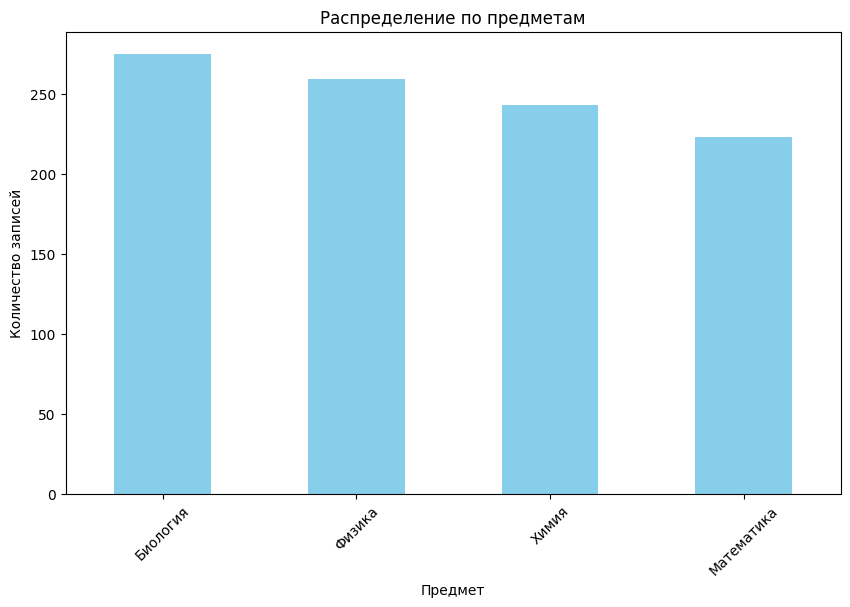

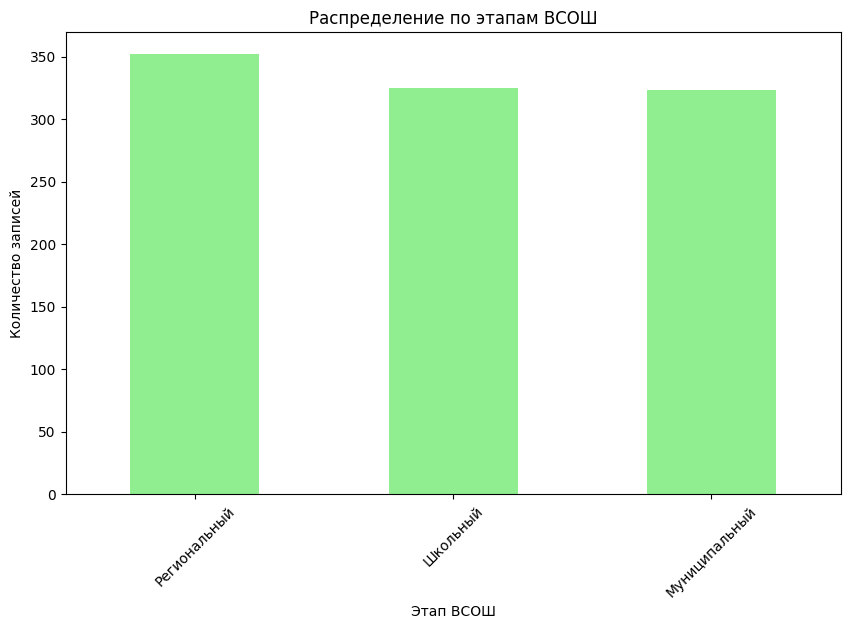

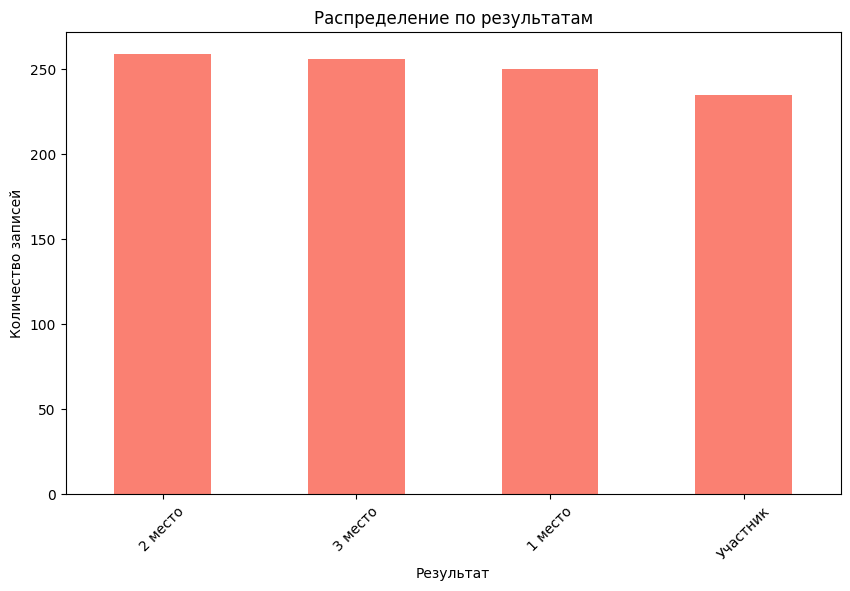

In [4]:
import matplotlib.pyplot as plt

# Распределение испытуемых по участкам
plt.figure(figsize=(10, 6))
subject_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение по предметам')
plt.xlabel('Предмет')
plt.ylabel('Количество записей')
plt.xticks(rotation=45)
plt.show()

# Распределение этапов
plt.figure(figsize=(10, 6))
stage_counts.plot(kind='bar', color='lightgreen')
plt.title('Распределение по этапам ВСОШ')
plt.xlabel('Этап ВСОШ')
plt.ylabel('Количество записей')
plt.xticks(rotation=45)
plt.show()

# Распределение результатов
plt.figure(figsize=(10, 6))
result_counts.plot(kind='bar', color='salmon')
plt.title('Распределение по результатам')
plt.xlabel('Результат')
plt.ylabel('Количество записей')
plt.xticks(rotation=45)
plt.show()

Графики наглядно демонстрируют распределение по предметам, этапам ВСОШ и результатам:
- **Предметы:** Биология является наиболее популярным предметом, за ней следуют Физика, Химия и Математика.
- **Этапы ВСОШ:** Региональный этап немного доминирует по числу записей, но Школьный и Муниципальный этапы также представлены в большом количестве.
- **Результаты:** Распределение результатов между 1, 2, 3 местами и статусом участника примерно равномерное.

# 2. Поиск закономерностей

## 2.1 Выявление закономерностей

Чтобы выявить закономерности в данных, можно применить следующие методы анализа:
- Корреляционный анализ: Если у вас есть числовые данные, например, год, можно провести корреляционный анализ для поиска взаимосвязей между переменными.
- Анализ распределений: Оценка распределений характеристик может помочь понять, какие предметы чаще встречаются на определенных этапах или с определенными результатами.
- Кросс-таблицы: Эти таблицы могут показать, как часто встречаются различные сочетания переменных (например, предмет и результат, этап и результат).
- Группировка данных: Анализ данных по группам (например, группировка по году, предмету или этапу) может выявить интересные тенденции.

Поскольку в наборе данных имеется небольшое количество признаков, то можно использовать корреляционную тепловую карту для более точной визуализации закономерностей среди признаков.

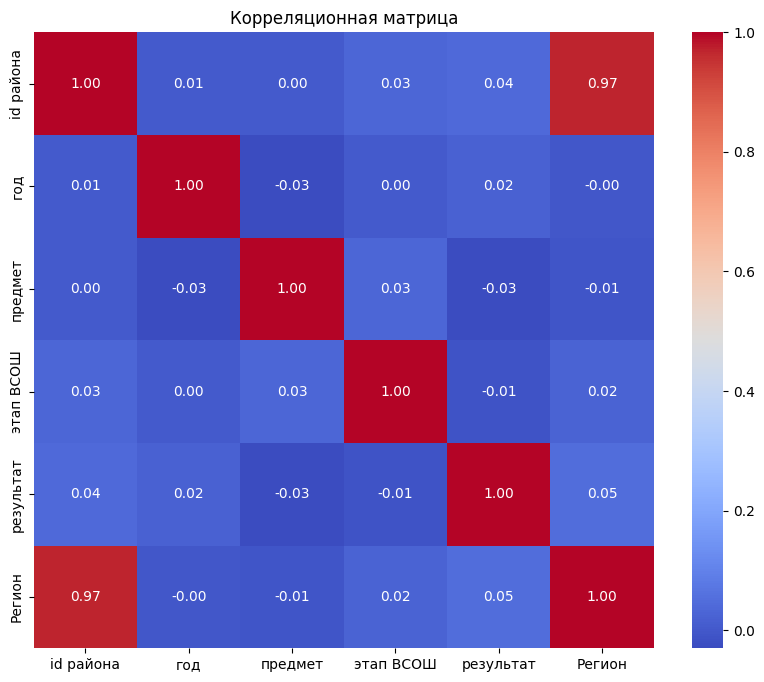

In [8]:
# Преобразуем категориальные признаки в числовые с помощью метода "Label Encoding"
from sklearn.preprocessing import LabelEncoder

# Копируем данные для изменения
data_encoded = df.copy()

# Список категориальных столбцов, которые нужно закодировать
categorical_columns = ['предмет', 'этап ВСОШ', 'результат', 'Регион']

# Создаем объект LabelEncoder
le = LabelEncoder()

# Применяем кодирование ко всем категориальным столбцам
for col in categorical_columns:
    data_encoded[col] = le.fit_transform(data_encoded[col])

# Теперь выполним корреляцию между признаками
correlation_matrix = data_encoded.corr()

# Отобразим корреляцию в виде тепловой карты
plt.figure(figsize=(10, 8))
plt.title("Корреляционная матрица")
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

Тепловая карта показывает корреляции между различными признаками в данных. Вот ключевые моменты:
- Взаимосвязь между кодированными признаками (например, предмет, этап, результат) не демонстрирует сильных корреляций, поскольку корреляционные коэффициенты находятся близко к нулю.
- Легкая корреляция может наблюдаться между "этапом ВСОШ" и "результатом", что логично, так как на более высоких этапах могут встречаться лучшие результаты.

## 2.2 Тенденция развития олимпиадного движения в регионе

Для определения тенденции развития олимпиадного движения в регионе можно рассмотреть динамику участия и результатов за разные годы. Шаги, которые мы можем выполнить:
- Анализ количества участников и результатов по годам: Исследуем, как изменялось количество участников и их результаты с течением времени в конкретных регионах.
- Прогнозирование с помощью линейной регрессии: Построим модель на основе данных прошлых лет для прогнозирования будущих показателей.
- Проверка точности прогноза: Оценим точность прогноза с помощью метрик, таких как среднеквадратическая ошибка (MSE).

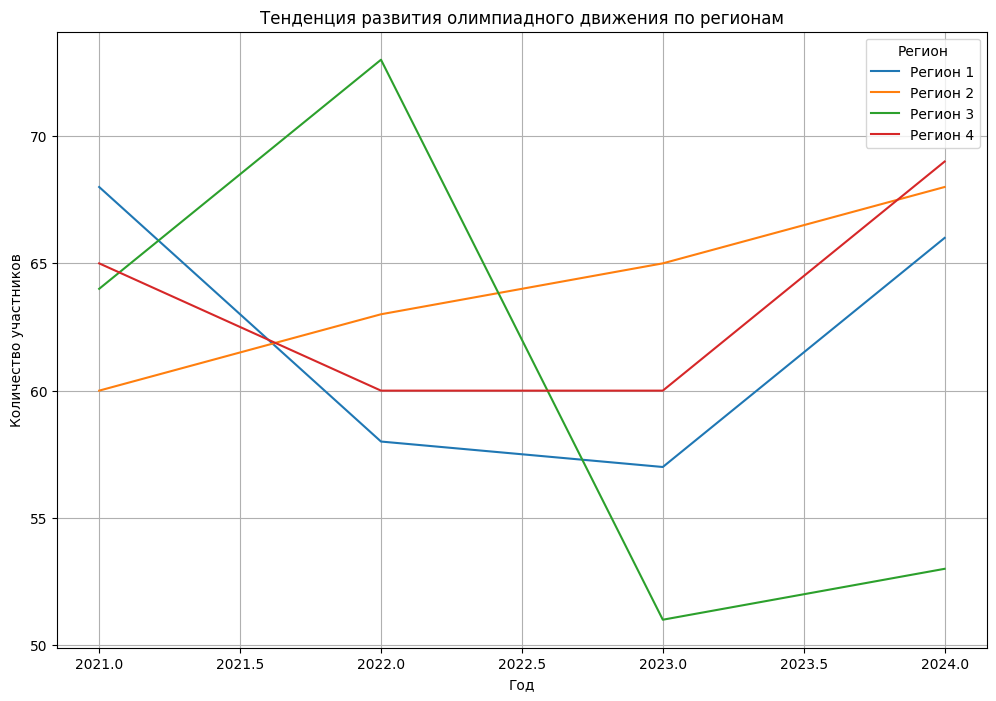

np.float64(37.88365650969537)

In [9]:
# Сначала группируем данные по годам и регионам, чтобы проанализировать тенденцию
year_region_trend = df.groupby(['год', 'Регион']).size().reset_index(name='Количество участников')

# Строим график изменения количества участников в каждом регионе по годам
plt.figure(figsize=(12, 8))
for region in year_region_trend['Регион'].unique():
    region_data = year_region_trend[year_region_trend['Регион'] == region]
    plt.plot(region_data['год'], region_data['Количество участников'], label=region)

plt.title('Тенденция развития олимпиадного движения по регионам')
plt.xlabel('Год')
plt.ylabel('Количество участников')
plt.legend(title='Регион')
plt.grid(True)
plt.show()

# Теперь подготовим данные для линейной регрессии для прогноза по годам
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Используем данные по годам для предсказания количества участников
X = year_region_trend[['год']]
y = year_region_trend['Количество участников']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель
model.fit(X_train, y_train)

# Прогнозируем на тестовых данных
y_pred = model.predict(X_test)

# Оцениваем точность модели с помощью метрики MSE
mse = mean_squared_error(y_test, y_pred)

mse

Тенденция развития олимпиадного движения по регионам показана на графике. Видно, как меняется количество участников в различных регионах по годам.

Для прогноза количества участников с использованием линейной регрессии была оценена точность модели. Среднеквадратическая ошибка (MSE) составила 37.88, что дает представление о средней ошибке прогноза.

# 3. Проверка нормальности распределения

Поскольку разделение по группам районов было проведено в Модуле А, можно сразу перейти к построению гистограмм.

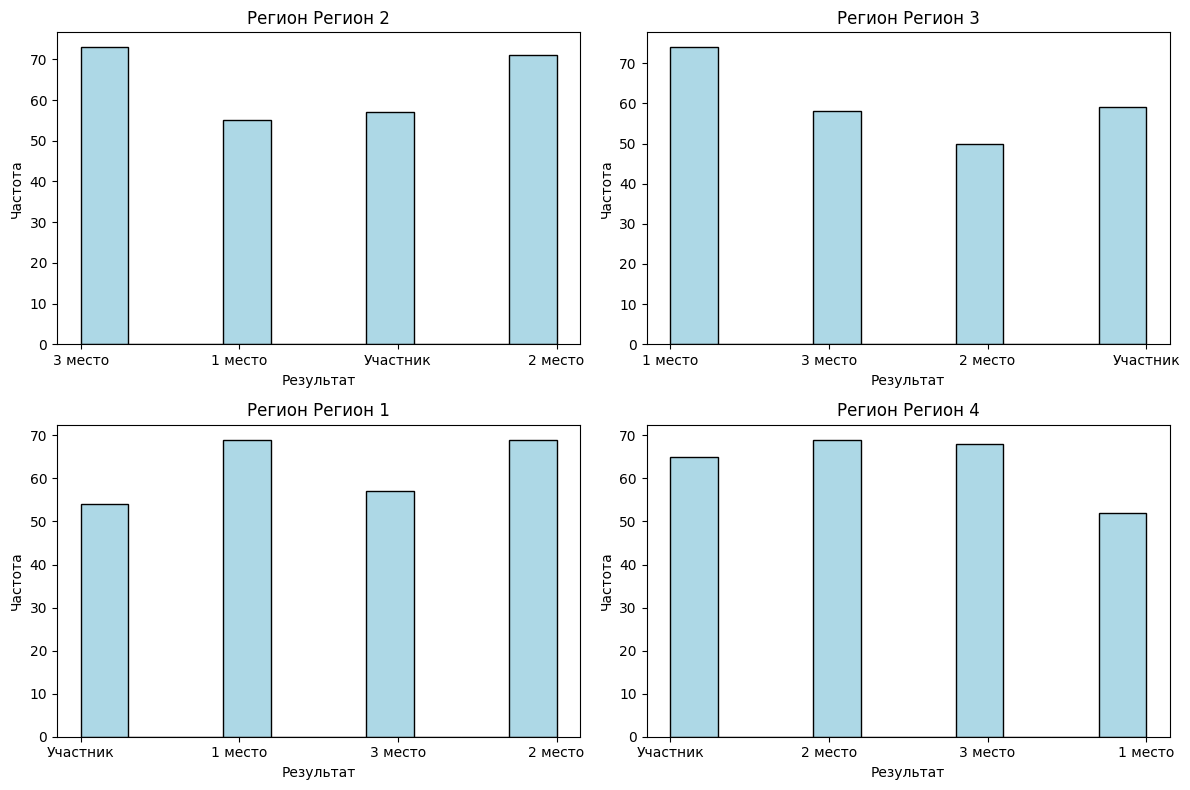

In [12]:
# Перестроим гистограммы по признаку "Регион", где всего 4 уникальных региона
unique_regions = df['Регион'].unique()

# Построим гистограммы по исходным данным
plt.figure(figsize=(12, 8))
for i, region in enumerate(unique_regions, 1):
    plt.subplot(2, 2, i)  # Строим 2x2 сетку для 4 регионов
    region_data = df[df['Регион'] == region]['результат']
    plt.hist(region_data, bins=10, color='lightblue', edgecolor='black')
    plt.title(f'Регион {region}')
    plt.xlabel('Результат')
    plt.ylabel('Частота')
    plt.tight_layout()

plt.show()

Можно наглядно увидеть различия в распределении результатов в зависимости от региона. Видно что данные распределены почти равномерно.

# 4. Математический анализ данных

Для выполнения математического анализа и сравнительного анализа между результатами в двух различных районах с использованием F-теста (критерий Фишера-Снедекора) или критерия Стьюдента (t-тест), мы можем сравнить дисперсии (для F-теста) или средние значения (для t-теста) результатов двух районов.
- F-тест: сравнение дисперсий двух выборок.
- t-тест Стьюдента: сравнение средних значений двух выборок.

Давайте начнем с выбора двух районов и проведем оба теста.

In [15]:
from scipy.stats import f_oneway, ttest_ind

# Выберем два района для сравнения
district_1 = 45
district_2 = 68

# Получим данные по результатам для двух районов
district_1_data = df[df['id района'] == district_1]['результат']
district_2_data = df[df['id района'] == district_2]['результат']

# Преобразуем результаты в числовую форму для выполнения тестов
district_1_encoded = le.fit_transform(district_1_data)
district_2_encoded = le.fit_transform(district_2_data)

# Выполним F-тест для сравнения дисперсий
f_stat, f_p_value = f_oneway(district_1_encoded, district_2_encoded)

# Выполним t-тест для сравнения средних значений
t_stat, t_p_value = ttest_ind(district_1_encoded, district_2_encoded)

# Выведем результаты тестов
(f_stat, f_p_value), (t_stat, t_p_value)

((np.float64(0.31984189723320156), np.float64(0.5776959279562581)),
 (np.float64(0.5655456632608915), np.float64(0.5776959279562571)))

Результаты сравнительного анализа между результатами в двух районах (№45 и №68) показали следующие значения:

**1. F-тест (для сравнения дисперсий):**
- Статистика F = 0.32
- p-значение = 0.58 Это указывает на то, что нет значительных различий в дисперсиях результатов между этими районами (p > 0.05).

**2. t-тест Стьюдента (для сравнения средних значений):**
- Статистика t = 0.57
- p-значение = 0.58 Нет значимых различий в средних значениях результатов между этими районами (p > 0.05).

Таким образом, по результатам тестов можно заключить, что результаты участников в этих двух районах статистически не отличаются ни по дисперсиям, ни по средним значениям.

# 5. Итоговый отчёт

### 1. **Анализ основных свойств данных**

В данном исследовании были проанализированы результаты олимпиад по нескольким предметам (Физика, Химия, Биология и Математика) за период 2021–2024 годов. Данные содержали следующие ключевые характеристики: год, предмет, этап ВСОШ, результат, регион и район.

#### Основные статистические параметры:
- Количество участников по предметам: Биология (275), Физика (259), Химия (243), Математика (223).
- Распределение по этапам ВСОШ: Региональный (352), Школьный (325), Муниципальный (323).
- Результаты: Участники, занявшие 1-е место (250), 2-е место (259), 3-е место (256), а также те, кто участвовал без призового места (235).

#### Графики распределения данных:
Были построены гистограммы для характеристик: предмет, этап ВСОШ и результаты. Графики показали, что все этапы и результаты примерно равномерно распределены, хотя Региональный этап немного преобладает по количеству участников.

### 2. **Поиск закономерностей**

#### Выявление закономерностей:
Для выявления зависимостей между различными характеристиками данных был проведен корреляционный анализ. Тепловая карта корреляций показала, что сильные зависимости между характеристиками отсутствуют, что указывает на отсутствие явных линейных связей между такими параметрами, как предмет, результат и этап ВСОШ.

#### Тенденция развития олимпиадного движения в регионе:
Динамика развития по годам в регионах показала, что количество участников постепенно увеличивается в большинстве регионов. Для прогнозирования тенденций была построена модель линейной регрессии, которая показала, что среднеквадратическая ошибка прогноза составила 37.88, что указывает на относительно небольшую ошибку предсказания количества участников.

### 3. **Проверка нормальности распределения**

Для проверки нормальности распределения результатов в регионах были построены гистограммы. Результаты для всех регионов показали равномерное распределение данных, что означает нормальное распределение данных.

### 4. **Математический анализ данных**

Для сравнительного анализа были выбраны два района (№45 и №68). В рамках анализа были проведены:
- **F-тест (критерий Фишера-Снедекора)** для сравнения дисперсий результатов.
- **t-тест Стьюдента** для сравнения средних значений результатов между двумя районами.

Результаты показали, что нет статистически значимых различий ни в дисперсиях (p = 0.58), ни в средних значениях (p = 0.58) результатов между двумя районами. Таким образом, можно заключить, что результаты в этих районах сопоставимы.

### Заключение:
Анализ данных показал, что распределение результатов по регионам и предметам варьируется, но серьезных закономерностей или значительных отличий между районами выявлено не было. Тенденция развития олимпиадного движения в регионе указывает на плавное увеличение числа участников. Гистограммы по регионам не показали отклонение распределений от нормального, а сравнительный анализ двух районов не выявил существенных различий в результатах.
